<a href="https://colab.research.google.com/github/MichalRyszardWojcik/hello-world/blob/master/2020_08_22_python_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import chess
import chess.pgn
import io
pgn = io.StringIO('[Event "Belgium tt"]\n[Site "?"]\n[Date "1996.??.??"]\n[EventDate "?"]\n[Round "4"]\n[Result "1-0"]\n[White "David Bronstein"]\n[Black "Nebojsa Nikolic"]\n[ECO "B31"]\n[WhiteElo "2440"]\n[BlackElo "2435"]\n[PlyCount "119"]\n\n1. e4 c5 2. Nf3 Nc6 3. Bb5 g6 4. c3 Qb6 5. Ba4 Bg7 6. O-O e5 7. Na3 Nge7 8. d4 cxd4 9. cxd4 Nxd4 10. Nc4 Qe6 11. Ncxe5 O-O 12. Qxd4 d6 13. Bf4 Nc6 14. Nxc6 Bxd4 15. Ncxd4 Qxe4 16. Bh6 Bg4 17. Rfe1 Qd5 18. Bb3 Qh5 19. Bxf8 Kxf8 20. Rac1 Qa5 21. h3 Bd7 22. Rc3 Rc8 23. Rd3 h6 24. a3 Ba4 25. Ba2 Qa6 26. Rd2 Qa5 27. Kh2 Bd7 28. Re3 Re8 29. Red3 Qc7 30. Rc3 Qb6 31. Bd5 Ba4 32. Ne2 Qxf2 33. Ng3 Qb6 34. Ne4 Kg7 35. Rc4 Bd7 36. Rb4 Qe3 37. Nxd6 Re7 38. Bxb7 a5 39. Rbd4 Be6 40. Bc6 Qb3 41. Ba4 Qe3 42. Bb5 Kf8 43. a4 Rc7 44. Re2 Qc1 45. Rdd2 Qc5 46. Ne4 Qb6 47. Nc3 Rc5 48. Rf2 Rf5 49. Ne4 Rf4 50. Rfe2 g5 51. Ng3 g4 52. hxg4 Rxg4 53. Nh5 Qc7 54. g3 Rg6 55. Nd4 Rg5 56. Nxe6 fxe6 57. Nf4 Kg8 58. Rxe6 Re5 59. Rc6 Qb7 60. Rg6 1-0')
game = chess.pgn.read_game(pgn)

print(f'\n\ngame errors from log:{game.errors}')
# game.mainline()
# this should work according to the doc
#board = game.board()
# for move in game.mainline_moves(): board.push(move)
# this should work according to the doc
line = game.main_line() # fortunately this works




game errors from log:[]


[796, 3234, 405, 3690, 353, 3502, 658, 3817, 2136, 3958, 262, 3364, 80, 4020, 731, 2203, 1179, 2715, 1050, 2668, 1700, 3902, 219, 3307, 157, 3370, 2346, 3483, 2715, 2844, 1903, 3742, 324, 1827, 1553, 2279, 3069, 4029, 2, 2528, 983, 1971, 146, 3642, 1171, 3567, 528, 3288, 1096, 2088, 1227, 2592, 399, 1587, 276, 3772, 1299, 2098, 1234, 3241, 547, 3288, 1740, 2637, 790, 873, 1436, 3958, 1178, 1587, 1689, 2644, 1835, 3892, 2289, 3104, 1627, 3308, 3178, 1297, 2712, 1108, 1569, 3517, 1048, 3378, 716, 1282, 1739, 162, 2780, 2217, 1810, 3234, 781, 2213, 1180, 2397, 844, 2982, 1814, 2462, 1502, 1886, 1447, 2674, 918, 1966, 1371, 2982, 1772, 3436, 2525, 3966, 812, 2468, 2858, 3249, 2734]


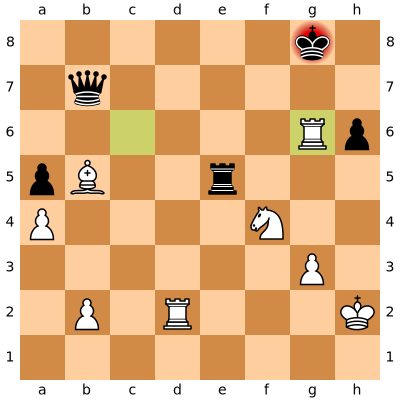

In [84]:
def move2token(move): return 64*move.from_square + move.to_square

def game2tokens(game):
  tokens = []
  line = game.main_line()
  for move in line: tokens.append(move2token(move))
  return tokens

print(game2tokens(game))

def tokens2board(tokens):
  board = chess.Board()
  for x in tokens:
    from_square = x//64
    to_square = x % 64
    move = chess.Move(from_square,to_square)
    board.push(move)
  return board

aaa = tokens2board(game2tokens(game))
aaa




I need a way to use a PGN file like this:
<code><pre>
pgn = open("data/pgn/kasparov-deep-blue-1997.pgn")
first_game = chess.pgn.read_game(pgn)
second_game = chess.pgn.read_game(pgn)
</pre></code>